In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/refs/heads/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [155]:
df.shape

(571, 43)

we have 571 rows and 43 columns in our dataset

In [156]:
df.drop('Seat No.',axis=1,inplace=True)

seat no will not have any impact on output result so removing that column.

In [157]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

there are only two types datatypes( float and object). also we can observe that there are some null values.

In [159]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [160]:
df.isnull().any()

PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CS-403        True
CS-421        True
CS-406        True
CS-414        True
CS-419        True
CS-423        True
CS-412        True
CGPA         False
dtype: bool

<Axes: >

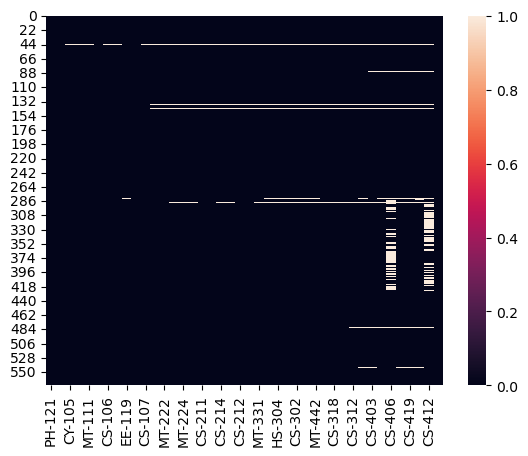

In [161]:
sns.heatmap(df.isnull())

most of the columns contains null values. and we are going to replace it with 0.because based on other values(other than null values) we are getting cgpa score.

In [162]:
df.sample(4)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
299,C,B+,A-,B-,B+,C+,B-,A,B,B-,...,A+,B,A,B,NaN,A,A-,B+,B,3.416
431,C,C,A,A-,B-,B+,C+,C,B,B-,...,A-,B,A,C,B,C+,A-,B+,B,2.784
154,A-,A-,A-,B-,B,A-,B-,A-,B+,D,...,D+,C,D+,C+,B+,A,C-,B-,B,2.603
180,A-,B+,B,A-,B,A-,B-,B,C+,B-,...,C-,C-,B-,C-,A-,A,C+,C,B+,2.749


In [163]:
df.dropna(subset=['CS-406','CS-412'],inplace=True)

Dropping NA values from cs-406 and cs-412 because it contains lot of NA values.

In [164]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       1
CS-403       1
CS-421       0
CS-406       0
CS-414       1
CS-419       1
CS-423       2
CS-412       0
CGPA         0
dtype: int64

In [165]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])

other columns contains only 1 or 2 null values so we are going to replace them with mode of their respective column.

In [166]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<Axes: >

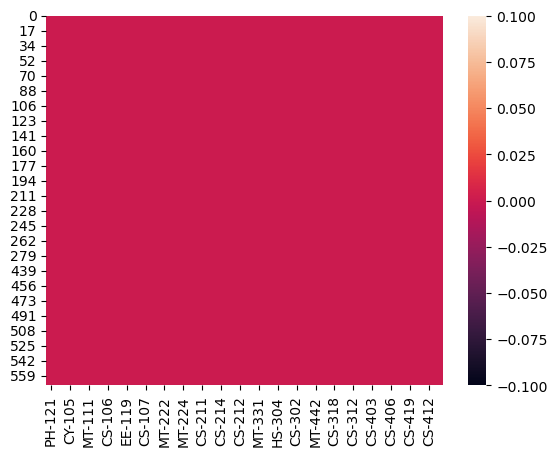

In [167]:
sns.heatmap(df.isnull())

In [168]:
from sklearn.preprocessing import LabelEncoder            # importing label encoder to convert categorical data into numerical
le=LabelEncoder()   

In [169]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]          # dividing the data into 2 parts (input and output)


In [170]:
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


In [171]:
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [172]:
for i in x.columns:
    x[i]=le.fit_transform(x[i])    # transforming x data

In [173]:
df=pd.concat([x,y],axis=1)        # joining x and y
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


In [174]:
df.duplicated().sum()

0

there is no duplicate values.

<Axes: >

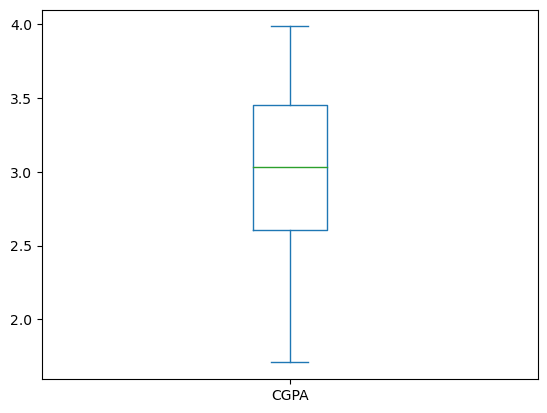

In [175]:
df.plot.box(x='PH-121',y='CGPA')

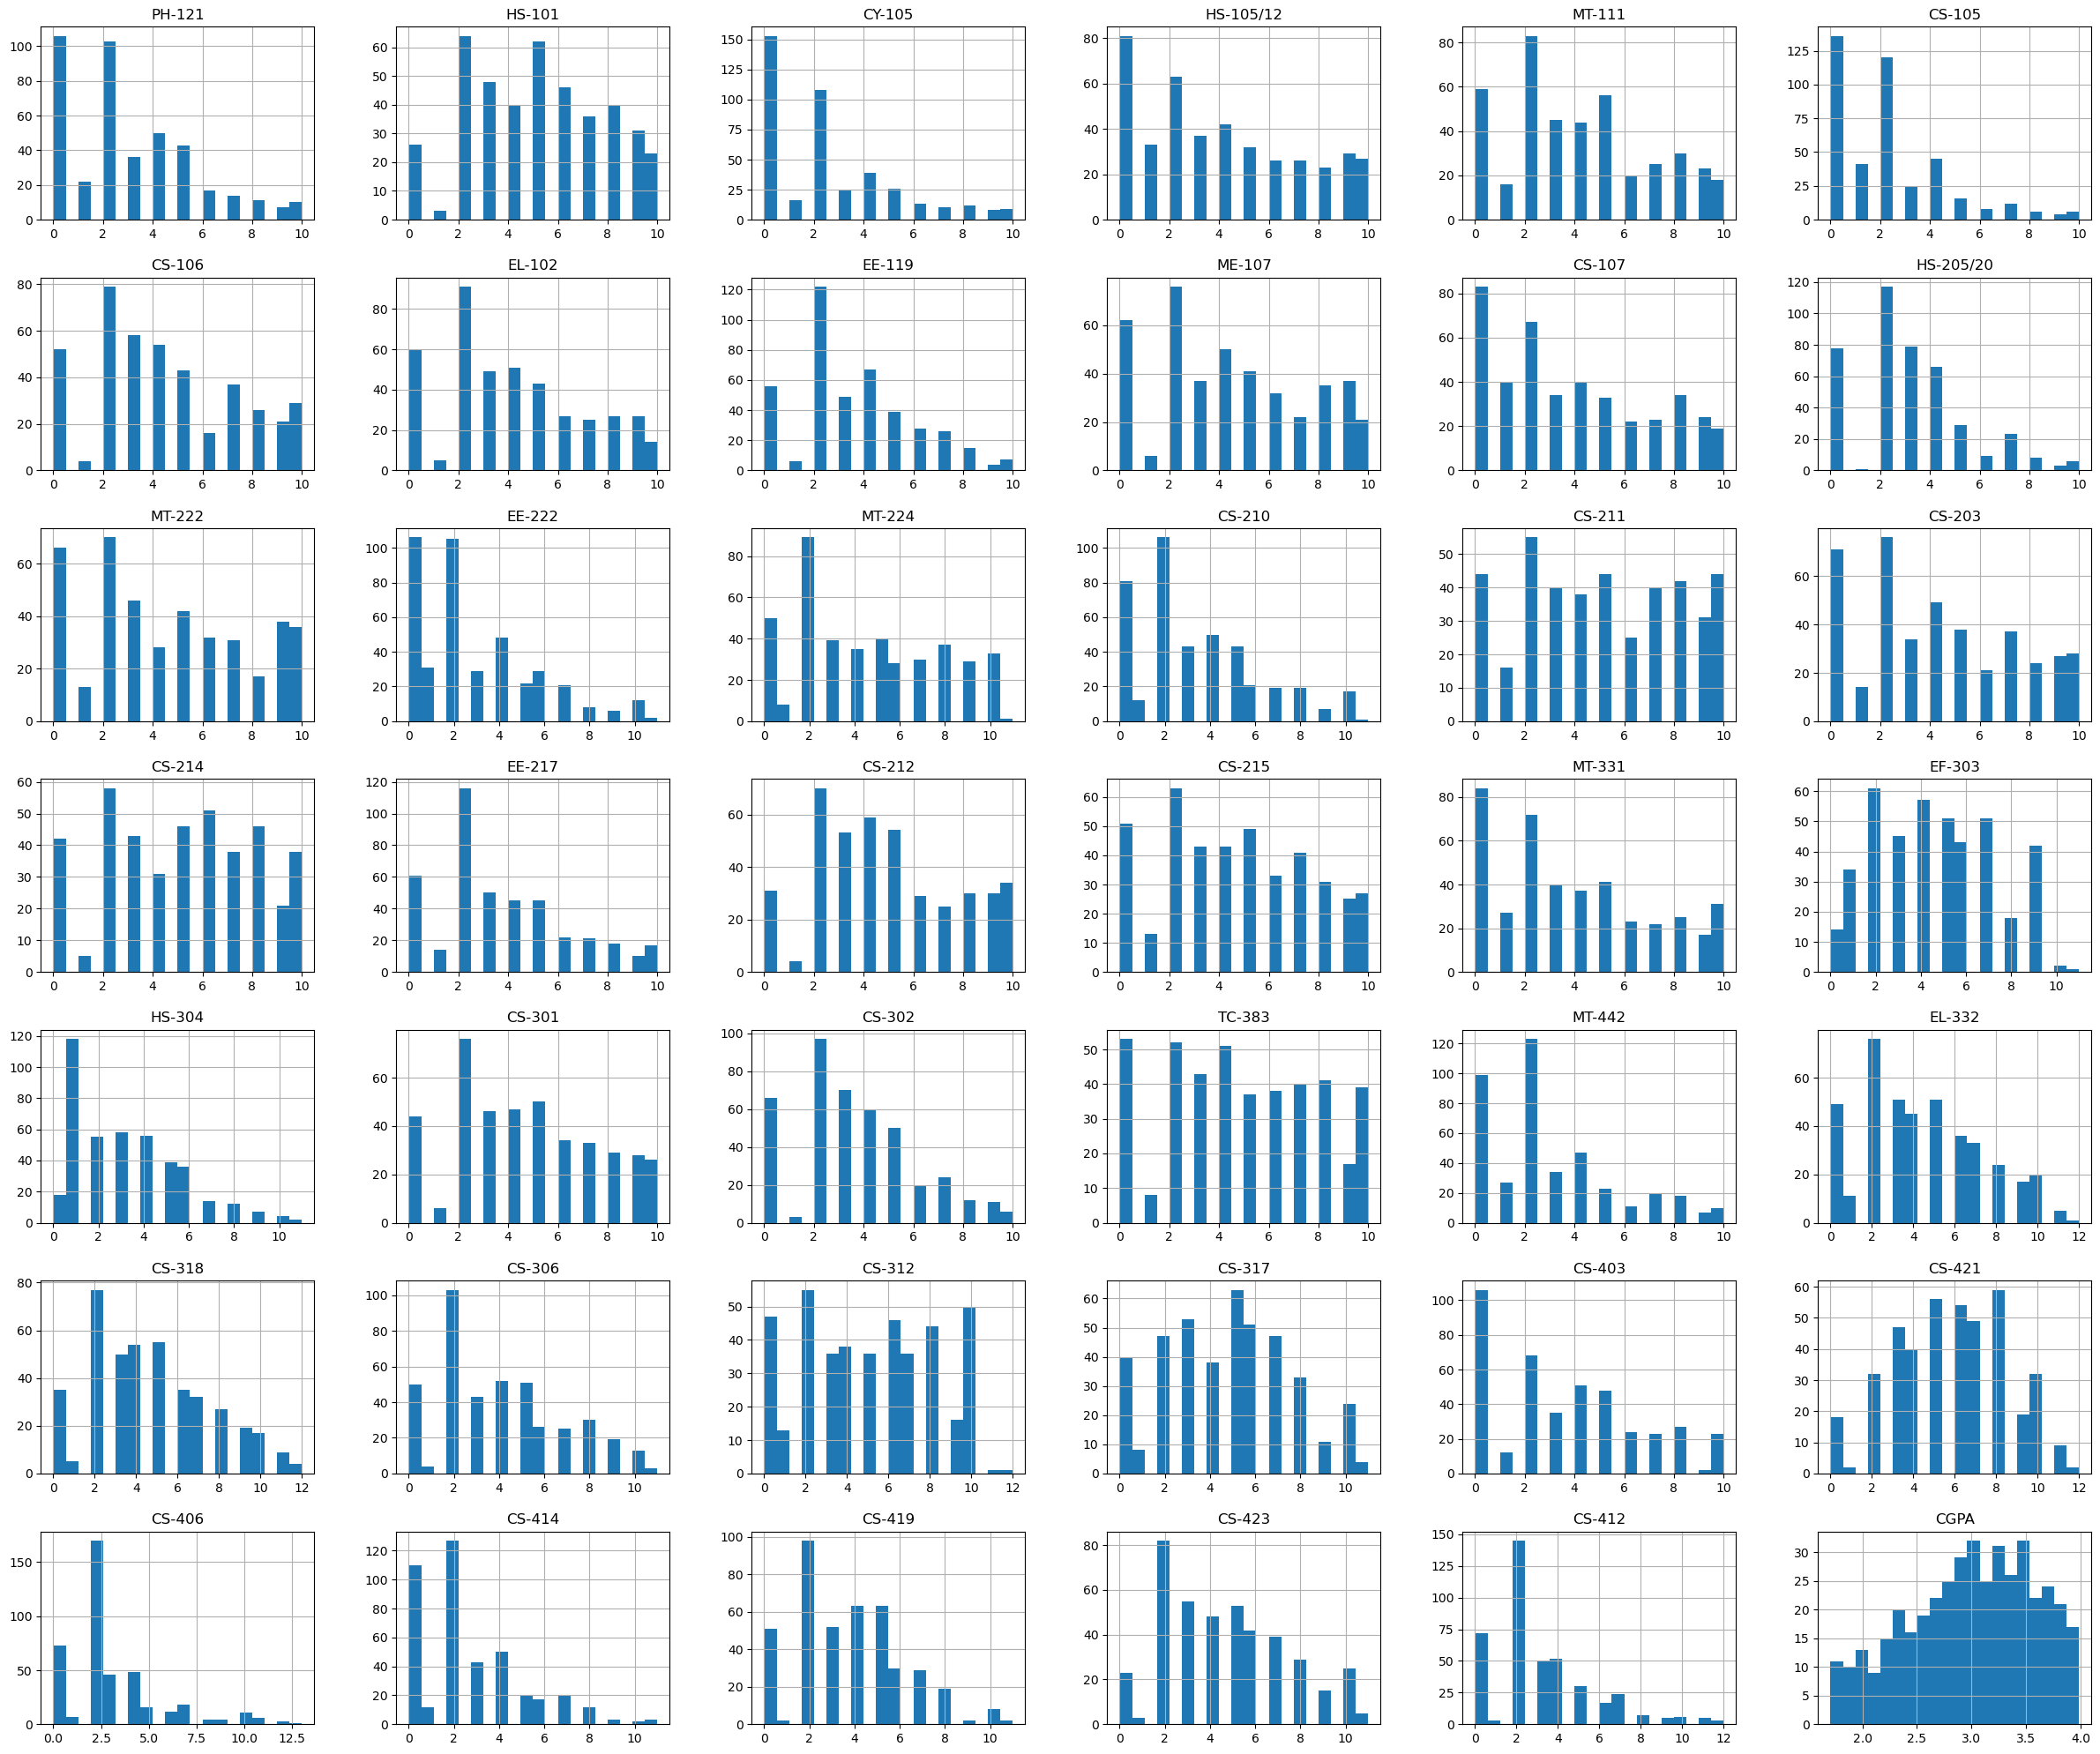

In [176]:
df.hist(bins=20,figsize=(30,25))
plt.show()

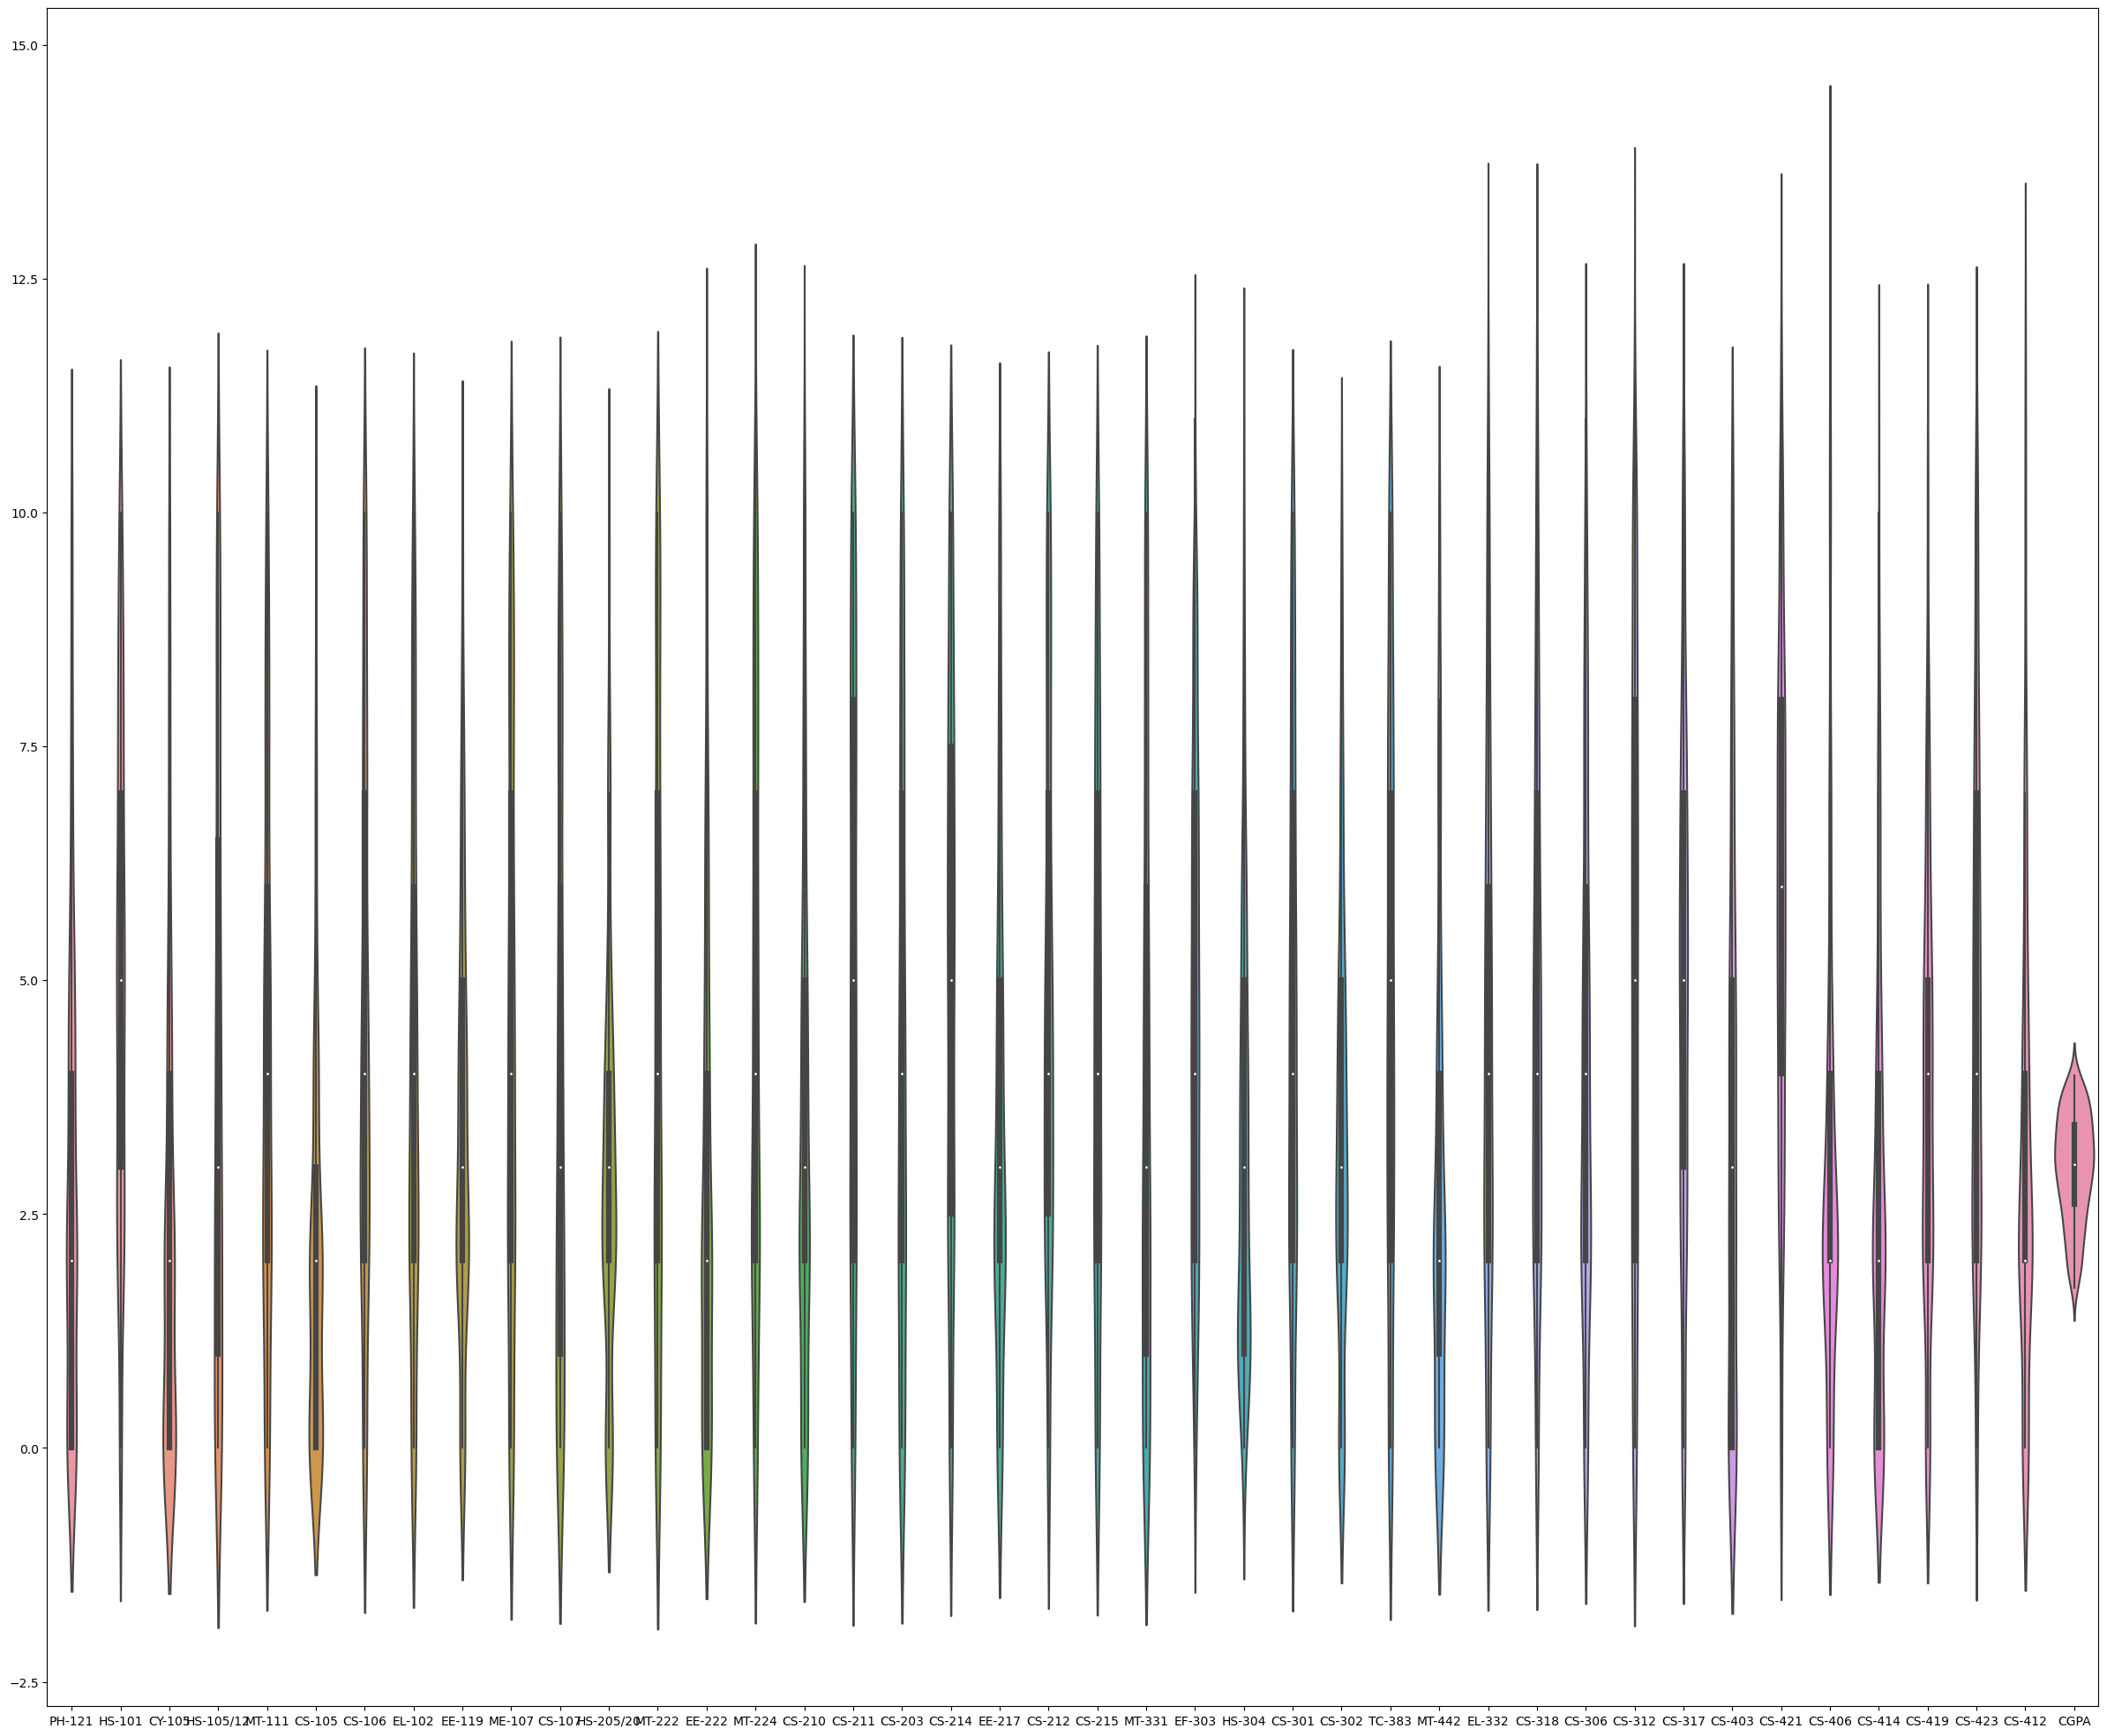

In [177]:
plt.figure(figsize=(30,25))
sns.violinplot(data=df)
plt.show()

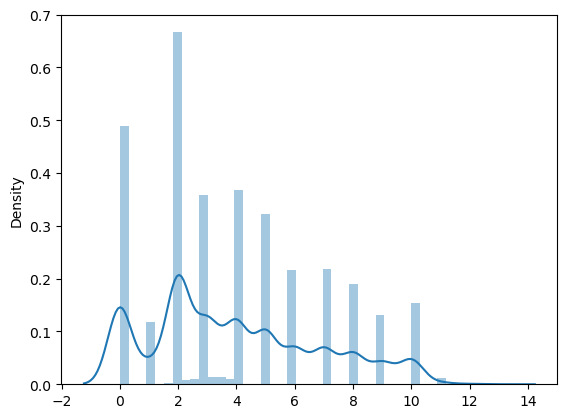

In [178]:
sns.distplot(df)
plt.show()

# data contains categorical data so no need to remove outliers and skewness.

In [179]:
df.skew()

PH-121       0.854424
HS-101       0.061362
CY-105       1.158126
HS-105/12    0.436777
MT-111       0.409461
CS-105       1.360587
CS-106       0.388943
EL-102       0.412827
EE-119       0.593603
ME-107       0.233046
CS-107       0.483337
HS-205/20    0.801189
MT-222       0.265665
EE-222       0.927029
MT-224       0.246480
CS-210       0.723003
CS-211       0.026716
CS-203       0.335825
CS-214      -0.027140
EE-217       0.720922
CS-212       0.289655
CS-215       0.160247
MT-331       0.519922
EF-303       0.164250
HS-304       0.841301
CS-301       0.236423
CS-302       0.570118
TC-383       0.076568
MT-442       0.985281
EL-332       0.387719
CS-318       0.437208
CS-306       0.464997
CS-312       0.028459
CS-317       0.068868
CS-403       0.526079
CS-421      -0.080062
CS-406       1.472391
CS-414       0.974402
CS-419       0.437414
CS-423       0.351908
CS-412       1.110392
CGPA        -0.325839
dtype: float64

In [180]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.339053,0.557961,0.482903,0.605868,0.530888,0.433454,0.515263,0.497992,0.504980,...,0.425100,0.552694,0.420574,0.500401,0.342671,0.255112,0.533690,0.446550,0.454052,-0.742246
HS-101,0.339053,1.000000,0.273636,0.427779,0.391901,0.364415,0.333501,0.270867,0.190573,0.247148,...,0.262320,0.336940,0.193589,0.264716,0.253290,0.187135,0.271148,0.270504,0.274502,-0.473338
CY-105,0.557961,0.273636,1.000000,0.476985,0.593281,0.528173,0.484070,0.405593,0.411745,0.396695,...,0.580785,0.484583,0.586606,0.474491,0.066689,-0.039197,0.502251,0.298722,0.135284,-0.635517
HS-105/12,0.482903,0.427779,0.476985,1.000000,0.476455,0.515372,0.557998,0.278307,0.360308,0.248205,...,0.439893,0.473619,0.518730,0.471055,0.133899,0.115011,0.476622,0.335350,0.198911,-0.595937
MT-111,0.605868,0.391901,0.593281,0.476455,1.000000,0.487705,0.516750,0.477639,0.419852,0.494620,...,0.548178,0.551294,0.484746,0.521873,0.288790,0.110117,0.573329,0.413323,0.302071,-0.739040
CS-105,0.530888,0.364415,0.528173,0.515372,0.487705,1.000000,0.458708,0.403640,0.400047,0.364810,...,0.410127,0.443946,0.419117,0.412277,0.269991,0.214288,0.370678,0.336677,0.306383,-0.648142
CS-106,0.433454,0.333501,0.484070,0.557998,0.516750,0.458708,1.000000,0.334155,0.390560,0.361195,...,0.501247,0.470395,0.542188,0.456841,0.138166,0.093495,0.527694,0.334938,0.210060,-0.618226
EL-102,0.515263,0.270867,0.405593,0.278307,0.477639,0.403640,0.334155,1.000000,0.467397,0.468074,...,0.366930,0.455455,0.328456,0.337841,0.242781,0.161582,0.411334,0.404588,0.335110,-0.613737
EE-119,0.497992,0.190573,0.411745,0.360308,0.419852,0.400047,0.390560,0.467397,1.000000,0.512922,...,0.427968,0.460515,0.398772,0.468864,0.330659,0.244410,0.500790,0.499546,0.447496,-0.648877
ME-107,0.504980,0.247148,0.396695,0.248205,0.494620,0.364810,0.361195,0.468074,0.512922,1.000000,...,0.382156,0.471722,0.331643,0.406145,0.310348,0.158513,0.488831,0.372944,0.383838,-0.648982


standarizing x data

In [181]:
from sklearn.preprocessing import StandardScaler      # importing standard scaler

In [182]:
ss=StandardScaler()

In [183]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.831342,1.824180,2.157356,0.641782,1.362833,3.473916,1.592029,1.392363,0.667458,1.176176,...,0.692757,0.932208,1.151832,1.521577,0.837615,-0.373700,-1.106098,1.757143,-0.639167,-0.454675
1,-1.119007,1.458121,2.925679,1.576569,0.328988,1.708518,1.592029,-1.414132,2.789347,1.502761,...,1.771809,1.561186,1.511458,0.845500,1.206271,-0.373700,0.975911,0.928041,0.462936,-0.061873
2,-1.119007,-0.738234,-0.915937,0.330187,-0.015627,-0.939580,0.232069,-0.010884,-0.605675,-0.783338,...,-0.745980,-0.640236,-0.646296,-1.182732,0.100303,-1.137508,-1.106098,-1.559267,-1.006535,-1.240280
3,2.391621,0.726003,2.925679,1.576569,1.707448,-0.056880,1.932019,1.392363,2.364970,0.849590,...,1.412125,1.561186,0.432581,2.197655,0.837615,0.772010,0.143107,1.342592,0.830304,1.509335
4,-0.338867,-1.104293,-0.147613,0.018592,-1.394087,-0.939580,-0.787900,-0.010884,-1.454431,-0.783338,...,-0.745980,-0.011259,-0.286671,0.169423,-0.268353,-0.373700,-1.106098,-0.730164,-1.006535,-1.240280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.051202,-1.836411,-0.915937,-0.604599,-1.049472,-0.939580,-0.787900,-0.712508,-1.030053,-0.130167,...,-0.026611,-0.954725,-1.005922,-1.182732,-2.111634,-1.137508,0.559509,0.098938,-0.639167,-1.240280
415,-0.728937,-1.836411,-0.915937,-1.227790,-1.394087,-0.939580,-1.467880,-0.712508,-1.454431,-1.436509,...,-0.745980,-0.325747,-0.286671,-1.182732,-2.111634,-0.373700,0.143107,-0.730164,0.462936,-0.454675
416,0.051202,-1.836411,-0.147613,0.018592,-1.394087,-0.939580,-1.467880,-1.414132,-1.454431,-0.456752,...,-0.026611,-0.954725,-0.646296,-1.182732,-0.637010,-1.137508,1.392313,0.098938,-1.006535,-0.454675
417,-1.119007,-0.372175,2.541518,-1.227790,1.707448,3.473916,0.232069,1.392363,0.667458,1.176176,...,-0.026611,1.246697,-0.646296,-0.168616,0.837615,2.299625,1.392313,-0.315613,0.095568,1.116533


# Model Building

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
l=LinearRegression()

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [186]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(293, 41)
(293,)
(126, 41)
(126,)


In [187]:
l.fit(x_train,y_train)

LinearRegression()

In [188]:
pred=l.predict(x_test)
print(r2_score(y_test,pred))

0.990800557119648


In [189]:
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.04405596143361838
0.003172296515201854
0.0563231436906877


In [190]:
from sklearn.model_selection import cross_val_score as cv

In [191]:
cross_value=cv(l,x,y)

In [192]:
acs=r2_score(y_test,pred)*100
print('accuracy score is:',acs)
cvs=cross_value.mean()*100
print('cross value score:',cvs)
dif=acs-cvs
print('difference:',dif)

accuracy score is: 99.0800557119648
cross value score: 98.76429230651208
difference: 0.31576340545272785


# Random forest regressor

In [193]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [194]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [195]:
pred1=rfr.predict(x_test)
print(r2_score(y_test,pred1)*100)

95.69176869807853


In [196]:
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))

0.09483730158730135
0.014856320457142837
0.12188650646048904


In [197]:
cross_value1=cv(rfr,x,y)

In [198]:
acs1=r2_score(y_test,pred1)*100
print('accuracy score is:',acs1)
cvs1=cross_value1.mean()*100
print('cross value score:',cvs1)
dif1=acs1-cvs1
print('difference:',dif1)

accuracy score is: 95.69176869807853
cross value score: 93.97053821943123
difference: 1.7212304786472998


# ExtraTreesRegressor

In [199]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()

In [200]:
ext.fit(x_train,y_train)

ExtraTreesRegressor()

In [201]:
pred2=ext.predict(x_test)
print(r2_score(y_test,pred2)*100)

96.7122231965864


In [202]:
print(mean_absolute_error(y_test,pred2))
print(mean_squared_error(y_test,pred2))
print(np.sqrt(mean_squared_error(y_test,pred2)))

0.08229698412698391
0.011337428833333288
0.10647736300891983


In [203]:
cross_value2=cv(ext,x,y)

In [204]:
acs2=r2_score(y_test,pred2)*100
print('accuracy score is:',acs2)
cvs2=cross_value2.mean()*100
print('cross value score:',cvs2)
dif2=acs2-cvs2
print('difference:',dif2)

accuracy score is: 96.7122231965864
cross value score: 95.55466151288256
difference: 1.1575616837038325


# Kneighbors Regressor

In [205]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [206]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [207]:
pred3=knn.predict(x_test)

In [208]:
print(r2_score(y_test,pred3)*100)

96.41079121820292


In [209]:
print(mean_absolute_error(y_test,pred3))
print(mean_squared_error(y_test,pred3))
print(np.sqrt(mean_squared_error(y_test,pred3)))

0.08556349206349208
0.012376873968253963
0.11125139984851411


In [210]:
cross_value3=cv(knn,x,y)

In [211]:
acs3=r2_score(y_test,pred3)*100
print('accuracy score is:',acs3)
cvs3=cross_value3.mean()*100
print('cross value score:',cvs3)
dif3=acs3-cvs3
print('difference:',dif3)

accuracy score is: 96.41079121820292
cross value score: 96.36100538803767
difference: 0.04978583016524851


# Support Vector Regressor

In [212]:
from sklearn.svm import SVR
svm=SVR()

In [213]:
svm.fit(x_train,y_train)

SVR()

In [214]:
pred4=svm.predict(x_test)
print(r2_score(y_test,pred4)*100)

97.39685870992643


In [215]:
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_squared_error(y_test,pred4)))

0.07425202422803694
0.008976561027098267
0.09474471503518424


In [216]:
cross_value4=cv(svm,x,y)

In [217]:
acs4=r2_score(y_test,pred4)*100
print('accuracy score is:',acs4)
cvs4=cross_value4.mean()*100
print('cross value score:',cvs4)
dif4=acs4-cvs4
print('difference:',dif4)

accuracy score is: 97.39685870992643
cross value score: 96.53289572737333
difference: 0.8639629825531046


# GradientBoost Regressor

In [218]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [219]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [220]:
pred5=gbr.predict(x_test)
print(r2_score(y_test,pred5)*100)

96.73267468848977


In [221]:
cross_value5=cv(gbr,x,y)

In [222]:
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_squared_error(y_test,pred5)))

0.08336504094757183
0.0112669047838451
0.1061456771792667


In [223]:
acs5=r2_score(y_test,pred5)*100
print('accuracy score is:',acs5)
cvs5=cross_value5.mean()*100
print('cross value score:',cvs5)
dif5=acs5-cvs5
print('difference:',dif5)

accuracy score is: 96.73267468848977
cross value score: 95.30874159881282
difference: 1.4239330896769502


# AdaBoosting regressor

In [224]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [225]:
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [226]:
pred6=abr.predict(x_test)
print(r2_score(y_test,pred6)*100)

92.84370448783929


In [227]:
cross_value6=cv(abr,x,y)

In [228]:
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_squared_error(y_test,pred6)))

0.1309342479258745
0.024677463201025356
0.1570906209836391


In [229]:
acs6=r2_score(y_test,pred6)*100
print('accuracy score is:',acs6)
cvs6=cross_value6.mean()*100
print('cross value score:',cvs6)
dif6=acs6-cvs6
print('difference:',dif6)

accuracy score is: 92.84370448783929
cross value score: 91.34952110945811
difference: 1.4941833783811802


# Ridge Regressor

In [230]:
from sklearn.linear_model import Ridge
rdg=Ridge()

In [231]:
rdg.fit(x_train,y_train)

Ridge()

In [232]:
pred7=rdg.predict(x_test)
print(r2_score(y_test,pred7)*100)

99.08370516607921


In [233]:
cross_value7=cv(rdg,x,y)

In [234]:
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_squared_error(y_test,pred7)))

0.04395803072565506
0.00315971189380672
0.05621131464222057


In [235]:
acs7=r2_score(y_test,pred7)*100
print('accuracy score is:',acs7)
cvs7=cross_value7.mean()*100
print('cross value score:',cvs7)
dif7=acs7-cvs7
print('difference:',dif7)

accuracy score is: 99.08370516607921
cross value score: 98.76681516781558
difference: 0.3168899982636333


# model performances

In [236]:
perform=pd.DataFrame({'model':['Linear','Random Forest','Extra Tree','KNN','SVM','Gradient Boost','AdaBoost','Ridge'],'Accuracy':[acs,acs1,acs2,acs3,acs4,acs5,acs6,acs7],'CrossValueScore':[cvs,cvs1,cvs2,cvs3,cvs4,cvs5,cvs6,cvs7],'diffrence':[dif,dif1,dif2,dif3,dif4,dif5,dif6,dif7]})
perform

,model,Accuracy,CrossValueScore,diffrence
0,Linear,99.080056,98.764292,0.315763
1,Random Forest,95.691769,93.970538,1.721230
2,Extra Tree,96.712223,95.554662,1.157562
3,KNN,96.410791,96.361005,0.049786
4,SVM,97.396859,96.532896,0.863963
5,Gradient Boost,96.732675,95.308742,1.423933
6,AdaBoost,92.843704,91.349521,1.494183
7,Ridge,99.083705,98.766815,0.316890


linear regression is performing well 

# Hyper Parameter Tuning for linear regression.

In [237]:
para={'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False]}

In [238]:
from sklearn.model_selection import  GridSearchCV

In [239]:
Gsv=GridSearchCV(estimator=l,param_grid=para)

In [240]:
Gsv.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [241]:
Gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

all parameters are default parameters

In [242]:
Final_Model = LinearRegression()

save the model for future purpose

In [243]:
import pickle

In [244]:
pickle.dump(Final_Model,open('CGPA predictor','wb'))

In [245]:
Model=pickle.load(open('CGPA predictor','rb'))    # to load the model

In [246]:
Model.fit(x_train,y_train)

LinearRegression()

In [247]:
pred10=Model.predict(x_test)

In [248]:
value=pd.DataFrame({'original_value':y_test,'Predicted_value':pred10})
value              

,original_value,Predicted_value
210,1.719,1.698587
428,3.477,3.432560
179,3.076,3.040041
519,2.982,2.989854
503,3.863,3.853768
...,...,...
256,2.605,2.597207
112,2.087,2.142733
105,3.208,3.169541
252,3.043,3.049049


accuracy of our final model is Good